In [1]:
import numpy as np
import pickle
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import seaborn as sns
from collections import defaultdict as ddict

import sys
sys.path.append('./../..')

import stationary_distribution_aug as sd
from mutator_classes import Parameters
from collections import namedtuple as nt
from copy import deepcopy

In [2]:
### Figure info ###
mpl.rcParams['figure.dpi'] = 400
font_size = 10
mpl.rcParams['axes.titlesize'] = font_size
mpl.rcParams['axes.labelsize'] = font_size
mpl.rcParams['xtick.labelsize'] = font_size
mpl.rcParams['ytick.labelsize'] = font_size
mpl.rcParams['legend.fontsize'] = font_size
mpl.rcParams['legend.title_fontsize'] = font_size
inner_font_size = 10
sns.set_style('whitegrid')
cmap = mpl.cm.get_cmap('winter')

class Colors():
    blue = np.array([0,0,1])
    green = np.array([0,1,0])
    teal = np.array([0,0.5,0.5])
    
# I prestored M(phi) values and just load them
with open('/Users/will_milligan/PycharmProjects/Mutator_Project/Final Figs/expectedMaxM_trinucleotide.pickle','rb') as fin:
    (s_values_exp,nvals_exp) = pickle.load(fin)

In [3]:
def axes_modifications(axes,title,text_y=5,s_values_exp=s_values_exp,nvals_exp=nvals_exp):

    axes.spines['bottom'].set_color('k')
    axes.spines['top'].set_color('k')
    axes.spines['left'].set_color('k')
    axes.spines['right'].set_color('k')
    axes.tick_params(left=True,bottom=True,which='both')
    axes.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
    
    axes.set_xlabel('Scaled Selection Parameter ' + r'$\left(4NLhs\phi\right)$')
    axes.set_ylabel('Number of Modifier Sites')
    axes.set_xlim([0.5e-2,2e3])
    axes.set_ylim([0.8e0,2.5e3])
    axes.set_xscale('log')
    axes.set_yscale('log')
    axes.grid(color=[0.9,0.9,0.9,0])
    axes.set_title(title)
    
    # all of this is mostly just scaling so the M(\phi) values are correct for each model
    x_scaling = 1
    if model == 'default':
        scaling = 1
        axes.text(10**(-2.2)*x_scaling,2,'Max. number of modifiers',rotation=-56,color='grey',zorder=1,fontsize=9.5)
    
    elif model == 'somatic':
        scaling = 2
        x_scaling = 1/2
        s_values_exp = s_values_exp*x_scaling
        s_accepted = np.where(s_values_exp>=1e-2)[0]
        s_values_exp = s_values_exp[s_accepted]
        nvals_exp = nvals_exp[s_accepted]
        
        axes.set_xlabel('Scaled Selection Parameter ' + r'$\left(8NLhs\phi\right)$')
    elif model == 'fewer':
        scaling = 1
    elif model == 'different':
        scaling = 1/np.mean([5]*4+[0.5]*4+[1]*88)*14000/20000
        
    axes.plot(s_values_exp,nvals_exp*scaling,color='grey',zorder=1)
#     axes.text(10**(-1.9),text_y=7,'Max. Number of Modifier Sites',rotation=-57,color='grey',zorder=1,fontsize=6)
    
        

In [4]:
def simple_intersection_plot(ax, points,legend=True):
    
    
    # plot the points
    for mode,points_list in points.items():
        if mode == 'relaxed':
            color = 'grey'
            marker = 'o'
        elif mode == 'restricted':
            color ='k'
            marker = '.'
        for (x,y) in points_list:
            ax.scatter(x,y,marker=marker,color=color)
    
    # make legend entries
    for mode in ['restricted','relaxed']:
        if mode == 'relaxed':
            color = 'grey'
            marker = 'o'
            label = 'Relaxed'
        elif mode == 'restricted':
            color ='k'
            marker = '.'
            label = 'Restricted'
            
        ax.plot([],[],marker=marker,color=color,label=label,ls='None')
    
    # make graph nice
    axes_modifications(ax, title = r'$\bf{D.}$ Intersection where both enrichments occur in $\geq 1\%$ of sets')
    
    # make legend
    if legend: ax.legend(loc = 'upper left',
                         edgecolor='k',
                         framealpha=1,
                         title='Peak-like def.',
                         handletextpad=0.2,
                         handlelength=1)

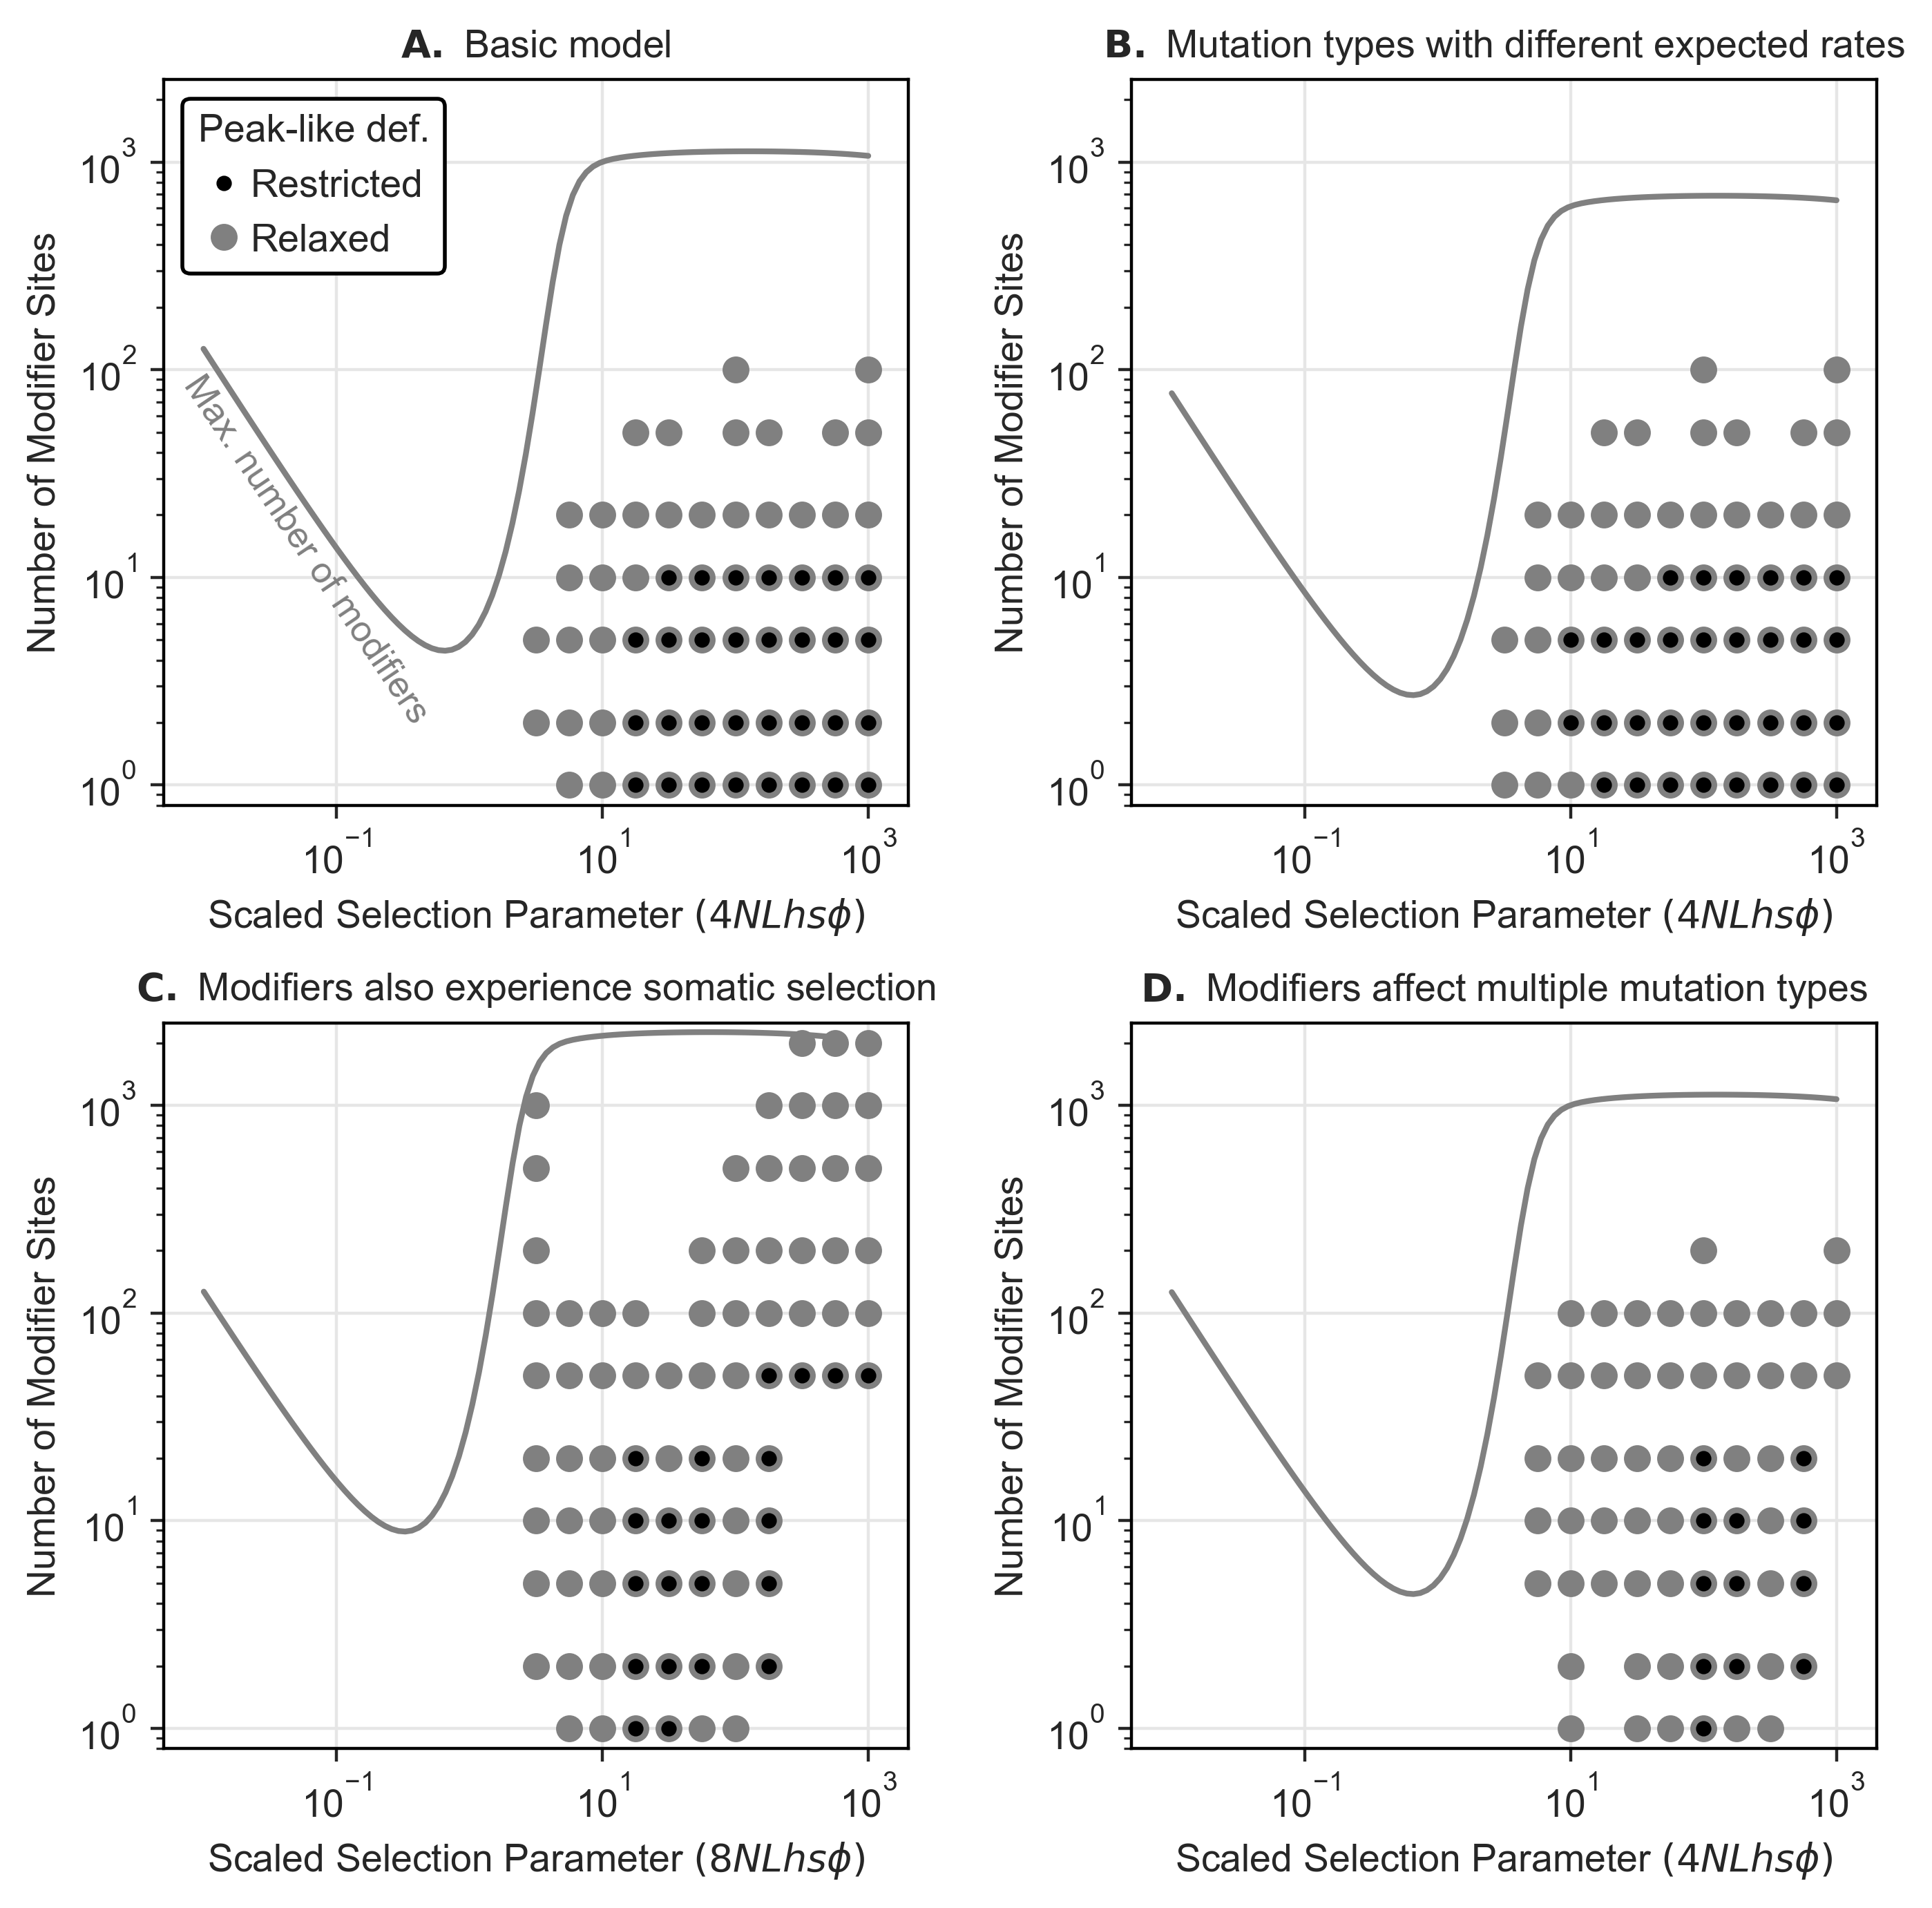

In [5]:
# make figure
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(8,8),dpi=400)

[[axes,axes2],[axes3,axes4]] = axes
for model,ax in zip(['default','different','somatic','fewer'],[axes,axes2,axes3,axes4]):
    # for each model, load the set of coordinates that pass both tests
    with open(f'./passing_points_{model}.pickle','rb') as fin:
        points = pickle.load(fin)
    # plot those points
    simple_intersection_plot(ax,points,legend=(model=='default'))

# add titles
axes.set_title(r'$\bf{A.}$ Basic model')
axes2.set_title(r'$\bf{B.}$ Mutation types with different expected rates')
axes3.set_title(r'$\bf{C.}$ Modifiers also experience somatic selection')
axes4.set_title(r'$\bf{D.}$ Modifiers affect multiple mutation types')
plt.subplots_adjust(wspace=0.3,hspace=0.3)
